# Using Aplha Vantage API to collect stock price data into Python

In [2]:
#Used for pulling the data
import urllib.request 
import json
#Used for formatting the data
import pandas as pd
#Used for data visualisation
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
def getPriceOfStock(companySymbol, numOfDays): #Returns a pandaDF of the closing stock prices in the last x amount of days
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+companySymbol+"&outputsize=full&apikey=Y11HUWNU7HM58RRL"
    json_obj = urllib.request.urlopen(url)
    #Finds the data from the url
    data = json.load(json_obj)
    #Choosing the revelant key from the data dictionary
    dates = data["Time Series (Daily)"] 
    #Initializing lists to store the data
    final_prices = [] 
    calendar = []
    counter = 0
    #For-loop used to run through every trading day 
    for day in dates: 
        counter += 1
        #Limits the amount of data using the number of days wanted
        if counter > numOfDays: 
            break
        #Gets the stock's price - This will include Open, High, Low, Closed prices
        prices = dates[day]
        #Choosing the stock's closed price
        priceNum = float(prices['4. close']) 
        final_prices.append(priceNum)
        calendar.append(day)
    #Dictionary containing the company and it's stock prices 
    stockDict = {companySymbol : final_prices} 
    #Formatting the pulled data to a Panda DataFrame
    df = pd.DataFrame(data = stockDict, index = pd.to_datetime(calendar)) 
    return df

In [4]:
#NOTE: Alpha Vantage only allows 5 API calls a minute, 500 a day -> Can only have an input size of list size 5
#Function to format (multiple) stocks into a PandaDF
def bundleStockPrices(arrayOfCompanySymbols, numOfDays):
    largeTable = getPriceOfStock(arrayOfCompanySymbols[0], numOfDays) 
    del arrayOfCompanySymbols[0]
    for symbol in arrayOfCompanySymbols:
        smallTable = getPriceOfStock(symbol, numOfDays)
        #Concatenating the tables together
        largeTable = pd.concat([largeTable, smallTable.reindex(largeTable.index)], axis = 1) 
    return largeTable

To visualise the general impact of COVID-19 we tracked a sample of S&P500 index tracker funds:
- Fidelity® 500 Index Fund, FXAIX
- Schwab® S&P 500 Index Fund, SWPPX
- Vanguard 500 Index Fund Investor Shares, VFINX
- SPDR S&P 500 ETF Trust, SPY

In [8]:
SP500TickerSymbol = ['FXAIX','SWPPX','VFINX','SPY']
SP500_fund_prices = bundleStockPrices(SP500TickerSymbol, 150)
print(SP500_fund_prices.head())

             FXAIX  SWPPX   VFINX     SPY
2020-07-10  110.47  49.21  294.09  317.59
2020-07-09  109.82  48.70  291.05  314.38
2020-07-08  110.41  48.96  292.62  316.18
2020-07-07  109.55  48.58  290.34  313.78
2020-07-06  110.75  49.11  293.52  317.05


In [6]:
def plotLineGraph(title, df):
    try:
        #Plot a line graph with stock figures
        plt.plot(df)
        #Display a legend to help navigate the graph
        plt.legend(df.columns)
        #Display a title
        plt.title(title)
        #Output graph
        plt.show()
    except:
        print("There was an error. Please check your dataframe.")

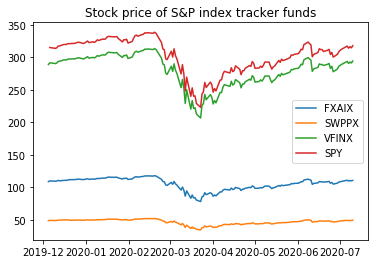

In [9]:
plotLineGraph("Stock price of S&P index tracker funds", SP500_fund_prices)

### Impact on certain industries in the market:

Tracking some of the largest airline companies (by revenue):
- Delta Air Lines, DAL
- American Airlines, AAL
- Deutsche Lufthansa, DLAKF
- United Airlines, UAL
- Air France KLM, AFRAF

Shown in the graph below, the airline industry was one of the largest areas hit by the pandemic

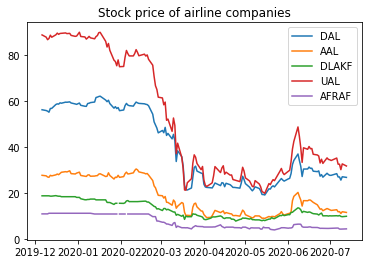

In [12]:
airlineCompanies = ['DAL','AAL','DLAKF','UAL','AFRAF']
airline_prices = bundleStockPrices(airlineCompanies, 150)
plotLineGraph("Stock price of airline companies", airline_prices)

One part of the market that recovered reasonably well was the pharmaceutical industry:
- Johnson & Johnson, JNJ
- Roche, RHHBF
- Sinopharm Group, SHTDF
- Pfizer, PFE
- GlaxoSmithKline, GSK

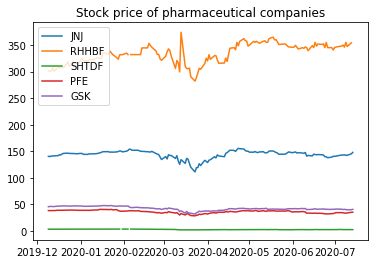

In [13]:
biomedicalCompanies = ['JNJ','RHHBF','SHTDF','PFE','GSK']
biomedical_prices = bundleStockPrices(biomedicalCompanies, 150)
plotLineGraph("Stock price of pharmaceutical companies", biomedical_prices)